<a href="https://colab.research.google.com/github/DANICKA-SHARON/Neonatal-Health-Assessment/blob/main/Neonatal_Health_Assessment_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Neonatal Health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,133,0.003,0.000,0.004,0.004,0.0,0.000,30,1.5,0,...,67,169,9,1,147,137,144,40,1,1
1,130,0.001,0.001,0.012,0.010,0.0,0.001,62,2.2,0,...,50,211,9,0,60,89,113,250,0,3
2,141,0.000,0.008,0.000,0.000,0.0,0.000,75,0.3,49,...,136,145,1,0,143,141,143,0,1,2
3,144,0.000,0.002,0.002,0.000,0.0,0.000,84,0.3,34,...,132,170,2,0,144,143,145,0,-1,3
4,106,0.001,0.000,0.011,0.000,0.0,0.000,63,0.6,0,...,95,125,1,0,112,110,112,1,0,1


In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

columns_to_scale = df.columns[:-1]

df_min_max_scaled = df.copy()
df_min_max_scaled[columns_to_scale] = min_max_scaler.fit_transform(df_min_max_scaled[columns_to_scale])

df_standard_scaled = df.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df_standard_scaled[columns_to_scale])

print("MinMaxScaler Scaled Data:")
print(df_min_max_scaled.head())

print("\nStandardScaler Scaled Data:")
print(df_standard_scaled.head())


MinMaxScaler Scaled Data:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0        0.500000       0.157895        0.000000              0.266667   
1        0.444444       0.052632        0.002079              0.800000   
2        0.648148       0.000000        0.016632              0.000000   
3        0.703704       0.000000        0.004158              0.133333   
4        0.000000       0.052632        0.000000              0.733333   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0             0.266667                   0.0                       0.0   
1             0.666667                   0.0                       0.2   
2             0.000000                   0.0                       0.0   
3             0.000000                   0.0                       0.0   
4             0.000000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0       

In [21]:
health_legend = {
    1: "Normal",
    2: "Suspect",
    3: "Pathological"
}

print("Legend for Fetal Health:")
for value, category in health_legend.items():
    print(f"{value}: {category}")

X = df_standard_scaled.drop(columns=['fetal_health'])
y = df_standard_scaled['fetal_health']
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
y_resampled -= y_resampled.min()

Legend for Fetal Health:
1: Normal
2: Suspect
3: Pathological


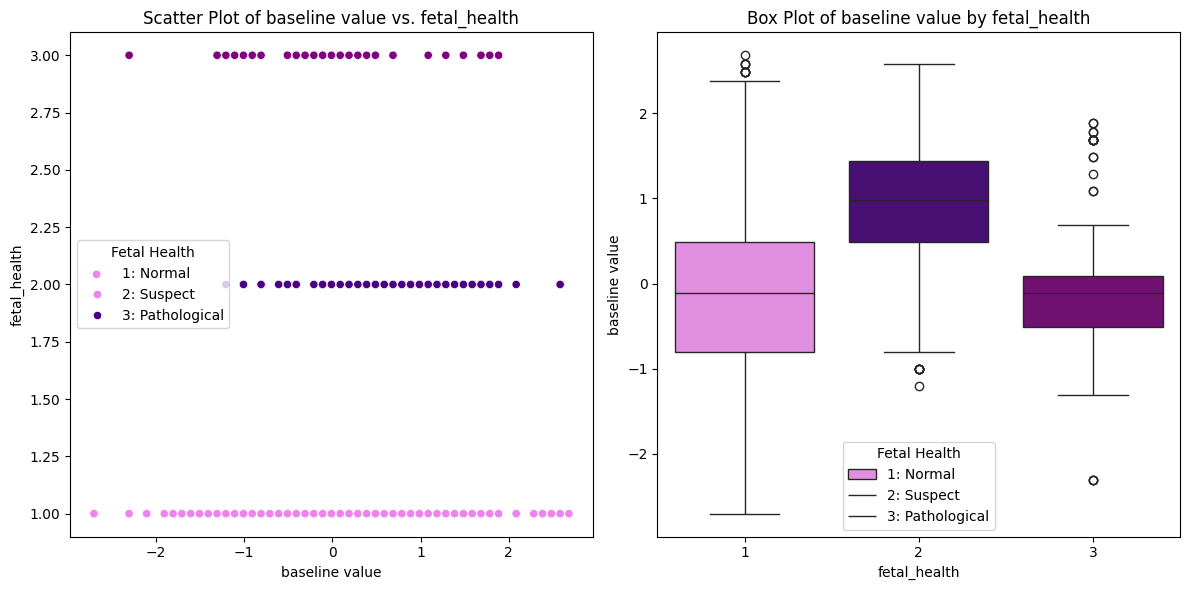

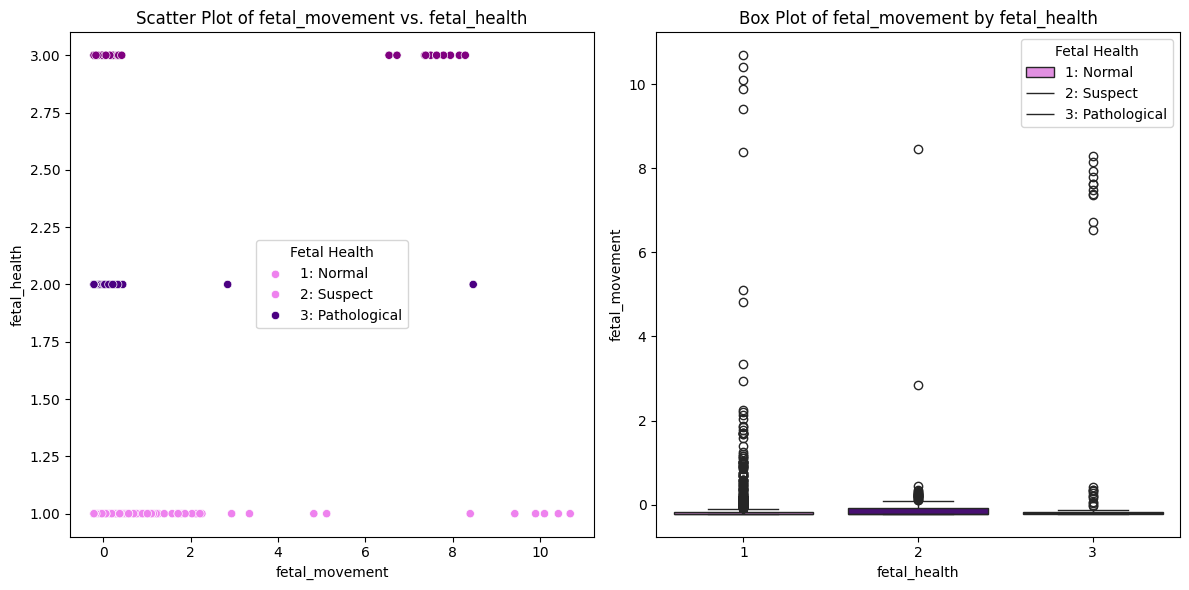

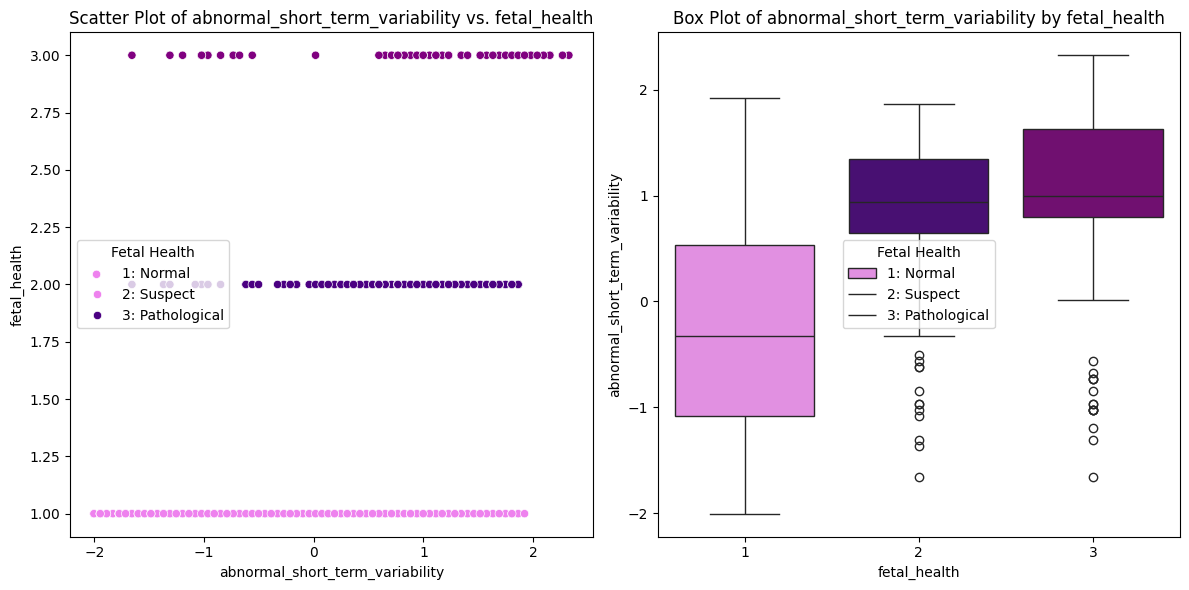

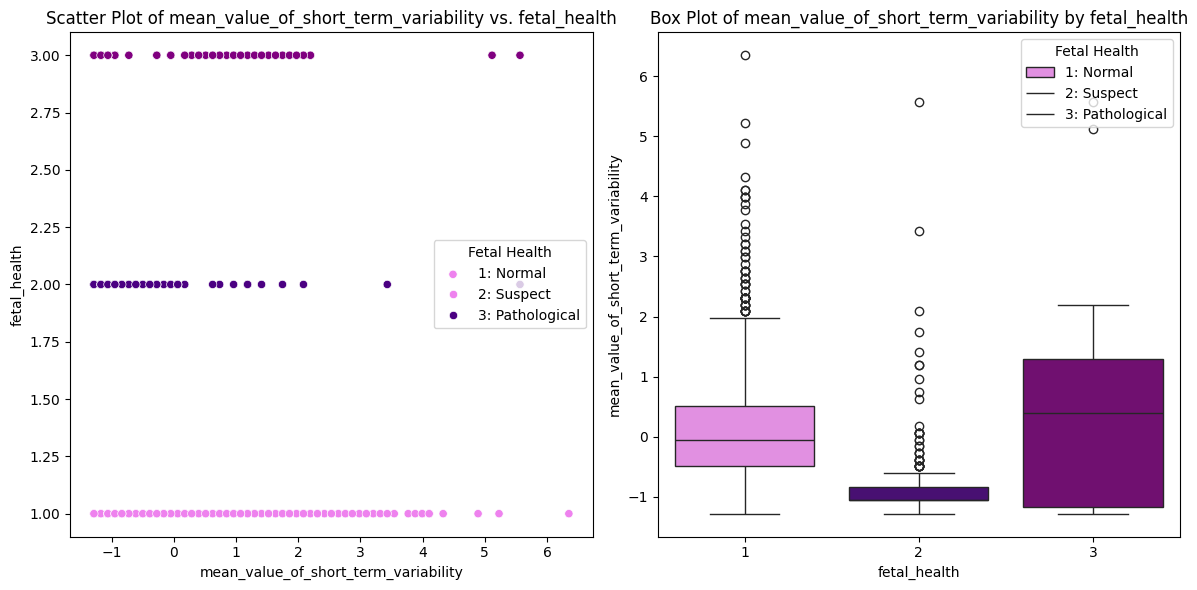

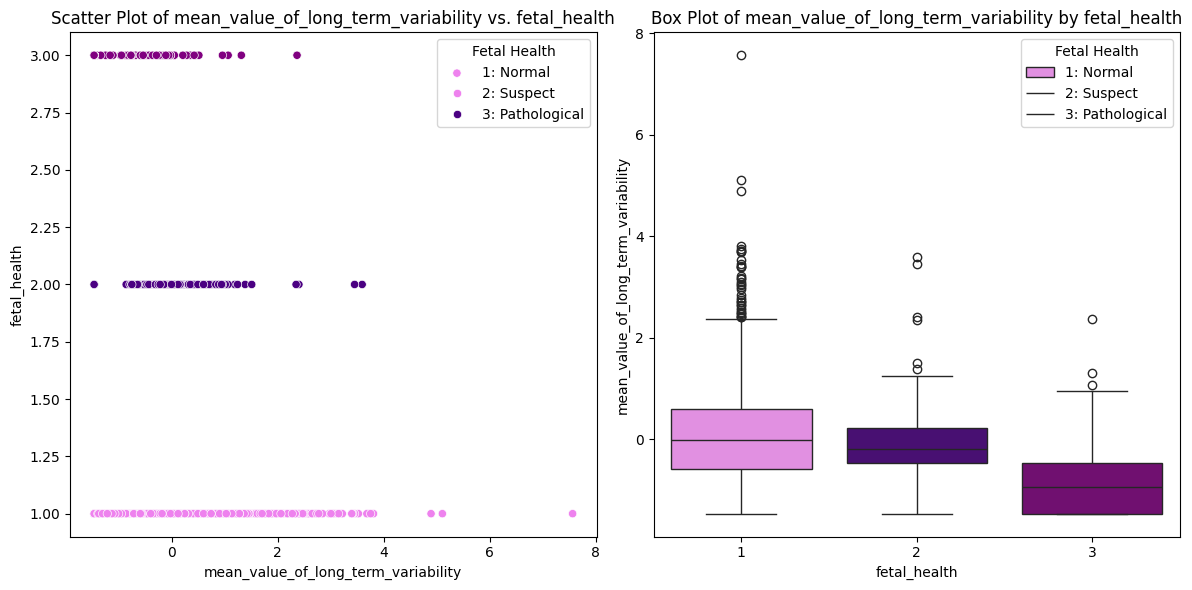

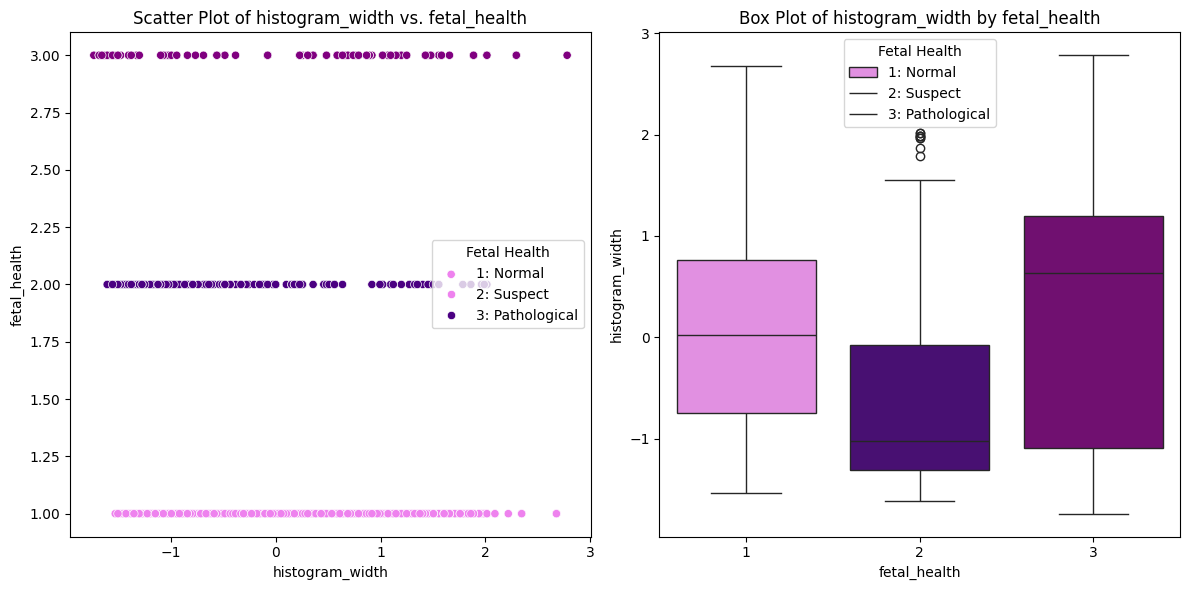

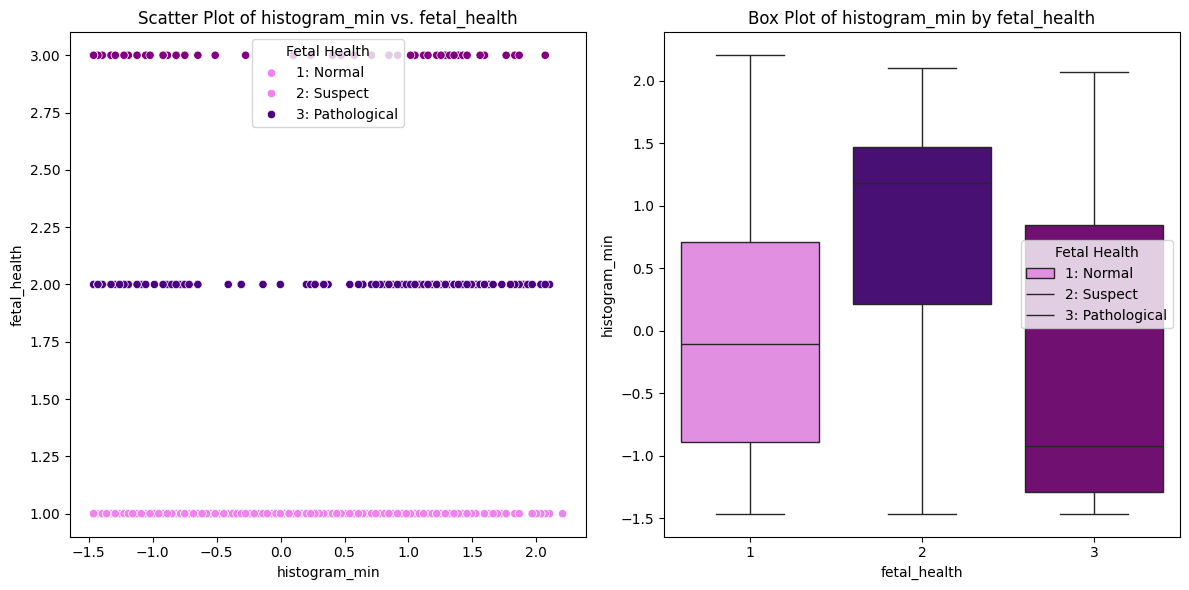

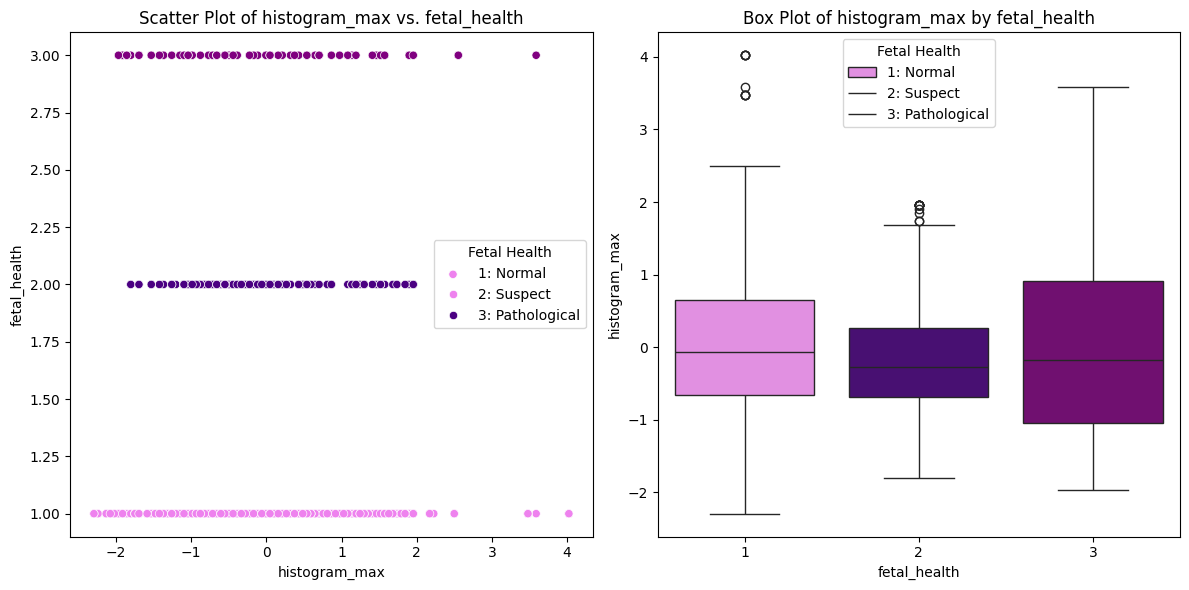

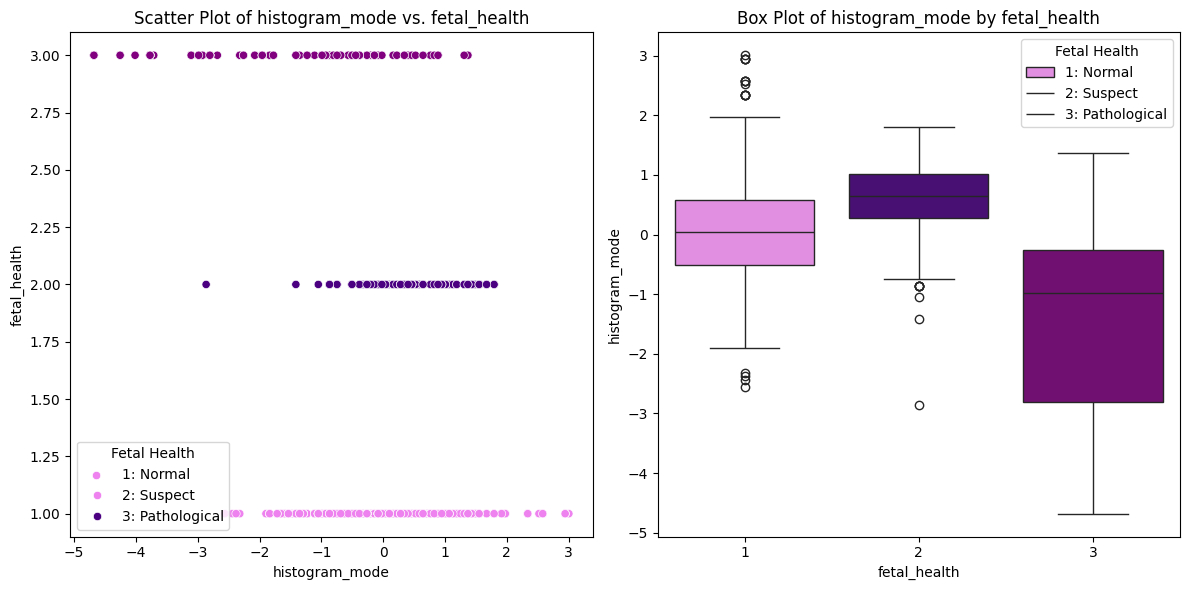

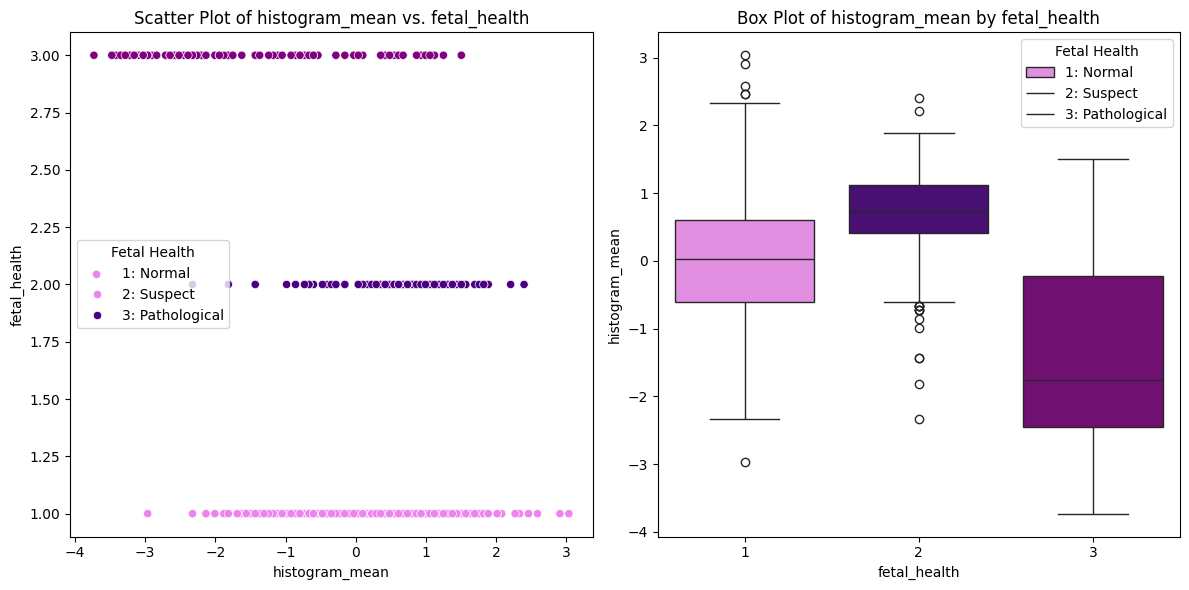

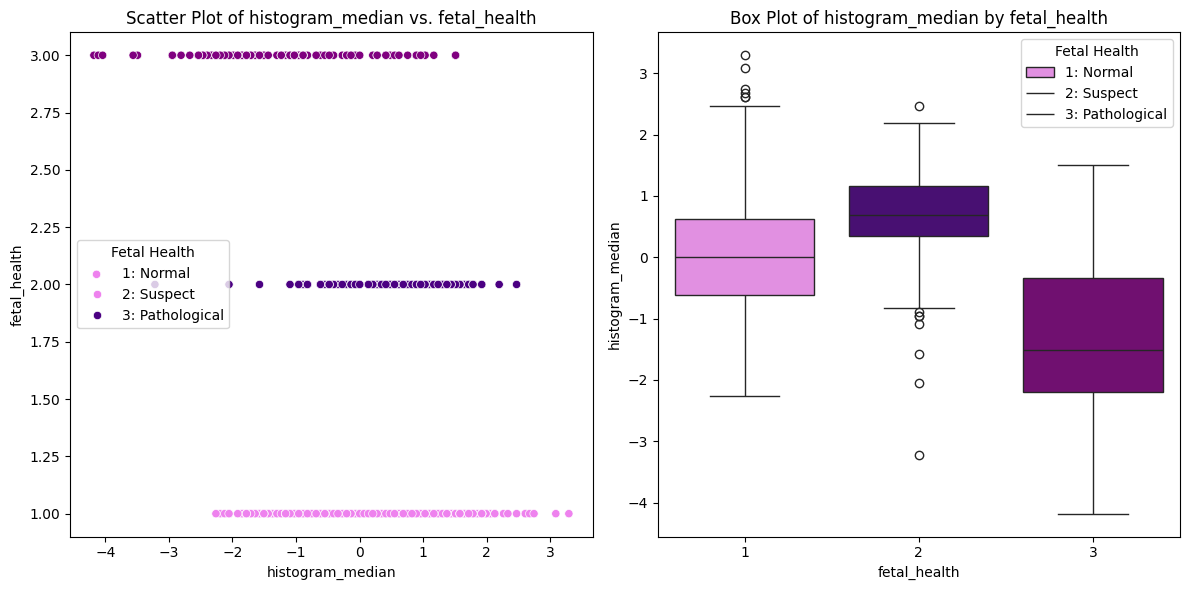

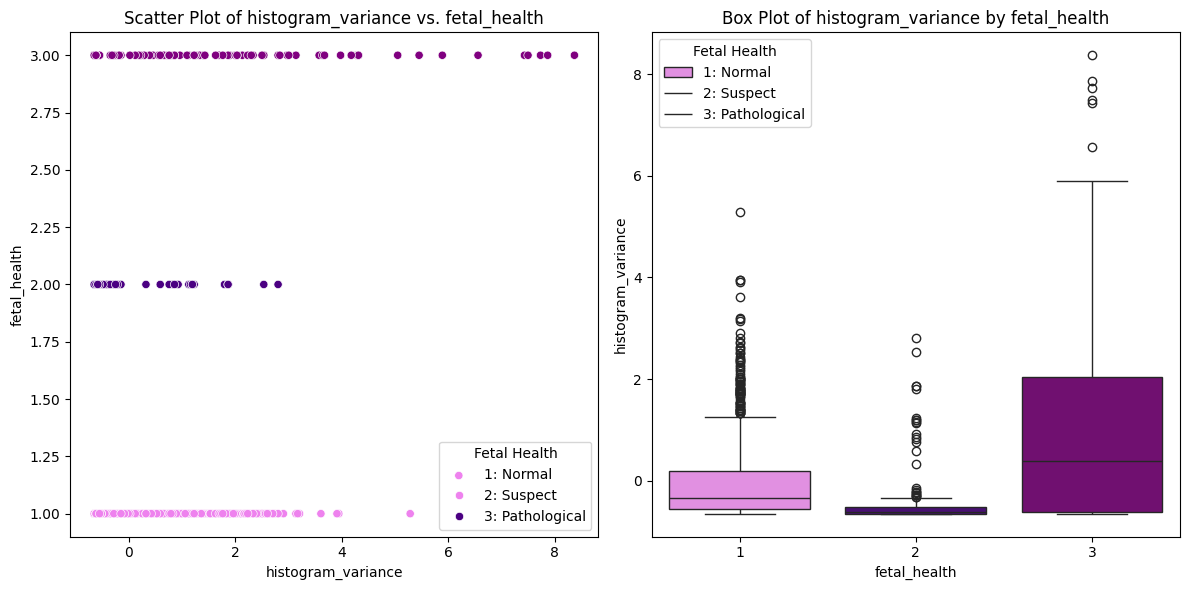

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

attribute_list = ['baseline value', 'fetal_movement', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                  'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_mode',
                  'histogram_mean', 'histogram_median', 'histogram_variance']

custom_palette = ['violet', 'indigo', 'purple']

for attribute in attribute_list:
    if attribute != 'fetal_health':
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Scatter plot
        sns.scatterplot(data=df_standard_scaled, x=attribute, y='fetal_health', hue='fetal_health', palette=custom_palette, ax=axs[0])
        axs[0].set_title(f'Scatter Plot of {attribute} vs. fetal_health')
        axs[0].legend(title='Fetal Health', labels=[f'{value}: {category}' for value, category in health_legend.items()])

        # Box plot
        sns.boxplot(data=df_standard_scaled, x='fetal_health', y=attribute, hue='fetal_health', palette=custom_palette, ax=axs[1])
        axs[1].set_title(f'Box Plot of {attribute} by fetal_health')
        axs[1].legend(title='Fetal Health', labels=[f'{value}: {category}' for value, category in health_legend.items()])

        plt.tight_layout()
        plt.show()


In [23]:
from sklearn.model_selection import train_test_split

X = df_standard_scaled.drop(columns=['fetal_health'])
y = df_standard_scaled['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, "Target:", y_test.shape)


Training set shape - Features: (1041, 21) Target: (1041,)
Testing set shape - Features: (447, 21) Target: (447,)


In [24]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, VotingClassifier
import warnings
warnings.filterwarnings("ignore")
# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert class labels to start from 0
y_resampled -= y_resampled.min()

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_resampled)), random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Random Forest Accuracy: 0.9865771812080537
Gradient Boosting Accuracy: 0.9769894534995206
SVM Accuracy: 0.9271332694151486
KNN Accuracy: 0.9204218600191755
Naive Bayes Accuracy: 0.775647171620326
Neural Network Accuracy: 0.9683604985618408
AdaBoost Accuracy: 0.8935762224352828
XGBoost Accuracy: 0.9865771812080537
Logistic Regression Accuracy: 0.8705656759348035
Decision Tree Accuracy: 0.9712368168744008
Extra Trees Accuracy: 0.9884947267497604


In [25]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    # print(f"ROC-AUC Score: {roc_auc}")
    print("\n")

Random Forest Evaluation Metrics:
Accuracy: 0.9865771812080537
Precision: 0.9867171735504852
Recall: 0.9865771812080537
F1-Score: 0.9865699014164188


Gradient Boosting Evaluation Metrics:
Accuracy: 0.9769894534995206
Precision: 0.9779891666359067
Recall: 0.9769894534995206
F1-Score: 0.9768556424856881


SVM Evaluation Metrics:
Accuracy: 0.9271332694151486
Precision: 0.9323195147863901
Recall: 0.9271332694151486
F1-Score: 0.9279739040001557


KNN Evaluation Metrics:
Accuracy: 0.9204218600191755
Precision: 0.922378686244893
Recall: 0.9204218600191755
F1-Score: 0.9198335867443374


Naive Bayes Evaluation Metrics:
Accuracy: 0.775647171620326
Precision: 0.8033554874328888
Recall: 0.775647171620326
F1-Score: 0.7746081648360148


Neural Network Evaluation Metrics:
Accuracy: 0.9683604985618408
Precision: 0.9690245649452027
Recall: 0.9683604985618408
F1-Score: 0.96828657366531


AdaBoost Evaluation Metrics:
Accuracy: 0.8935762224352828
Precision: 0.8975319117058849
Recall: 0.8935762224352828
F

In [26]:
from statistics import mode

rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_resampled)), random_state=42)
eta_model = ExtraTreesClassifier(random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
eta_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
eta_pred = eta_model.predict(X_test)

ensemble_pred = [mode([rf, xgb, eta]) for rf, xgb, eta in zip(rf_pred, xgb_pred, eta_pred)]


ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Ensemble Accuracy: 0.9904122722914669


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

# Define your base models
base_models = [
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_resampled)), random_state=42)
]

# Split the data into training and validation sets
X_train_base, X_meta_train, y_train_base, y_meta_train = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

# Train base models on the first half of the data
for model in base_models:
    model.fit(X_train_base, y_train_base)

# Generate predictions on the second half of the data
predictions = np.zeros((len(X_meta_train), len(base_models)))
for i, model in enumerate(base_models):
    predictions[:, i] = model.predict(X_meta_train)

# Train a meta-model (e.g., logistic regression) on the predictions
meta_model = LogisticRegression()
meta_model.fit(predictions, y_meta_train)

# Generate predictions from base models on the test set
test_predictions = np.zeros((len(X_test), len(base_models)))
for i, model in enumerate(base_models):
    test_predictions[:, i] = model.predict(X_test)

# Use the meta-model to predict the final outcome
ensemble_pred = meta_model.predict(test_predictions)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Accuracy (Stacking/Blending): {ensemble_accuracy}")


Ensemble Accuracy (Stacking/Blending): 0.9846596356663471


In [28]:
from sklearn.ensemble import VotingClassifier

# Initialize base models
rf_model = RandomForestClassifier(random_state=42)
eta_model = ExtraTreesClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_resampled)), random_state=42)

# Create the VotingClassifier
vote_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('eta', eta_model),
    ('xgb', xgb_model)
], voting='hard')

# Train the VotingClassifier
vote_model.fit(X_train, y_train)

# Predict using the VotingClassifier
vote_pred = vote_model.predict(X_test)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, vote_pred)
print(f"Voting Accuracy: {ensemble_accuracy}")


Voting Accuracy: 0.9904122722914669
